<a href="https://colab.research.google.com/github/mfazaluddin/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Background

As a child, I often wondered about the varying shapes and sizes of individuals, curious if it was because of differences in skeletal structures. However, as I grew older, I discovered that the key factor was not the skeleton but the distribution of body fat. This realization ignited a deep interest in understanding obesity and its implications. Over time, I learned about the significant health risks associated with obesity, such as hypertension and various comorbidities. This newfound awareness prompted me to adopt a health-conscious lifestyle and maintain fitness.

Over time, I became more aware of the serious health problems connected with obesity, including hypertension and other comorbidities. This newfound information inspired me to make a personal commitment to living a healthy lifestyle and pushing for exercise. When faced with the potential to conduct relevant research utilizing health data, I felt to perform a thorough examination of obesity trends in the United States.

The main objective of this project is to carefully breakdown a consolidated dataset related to obesity derived from various and relevant sources. This research aims to contribute to an informed and empowered community by promoting awareness and encouraging individuals to prioritize their health.

# Datasets Used

- [USA Statewise Population 2020](https://www.kaggle.com/datasets/adnananam/usa-statewise-population-2020) as CSV extracted from https://www.kaggle.com/

- [National Obesity By State](https://catalog.data.gov/dataset/national-obesity-by-state-d765a) as GeoJSON extracted from https://data.gov/

- [CDC Nutrition, Physical Activity, and Obesity - Legislation](https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/CDC-Nutrition-Physical-Activity-and-Obesity-Legisl/nxst-x9p4/about_data) as JSON extracted from https://www.cdc.gov/

- USA_Obesity_data(final dataset) extracted as CSV from notebook





# Imports

In [615]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from IPython.display import IFrame


#USA Statewise Population 2020

The United States of America's 2020 population statistics is included in this dataset which was provided by The official website of the United States Government. I selected this dataset to calculate the total population by state in the United States of America. By joining it with another related dataset, I hope to obtain some insightful information. A CSV file containing this dataset was extracted.

In [616]:
# Install the 'opendatasets' package using pip
!pip install opendatasets

In [617]:
dataset = 'https://www.kaggle.com/datasets/adnananam/usa-statewise-population-2020/download?datasetVersionNumber=1'

In [618]:
import opendatasets as od

- Kaggle Username: fuzzzzzza
- Kaggle key: 6be102020bec7a394206d0990888d492


In [619]:
od.download(dataset)

Skipping, found downloaded files in "./usa-statewise-population-2020" (use force=True to force download)


In [620]:
data_dir = './usa-statewise-population-2020'

In [621]:
# The directory where the dataset is downloaded
data_dir = './usa-statewise-population-2020'

In [622]:
# List the files in the directory
os.listdir(data_dir)

['usa_statewise_population_2020.csv']

In [623]:
# List the files in the directory
file_list = os.listdir(data_dir)


In [624]:
csv_file_name = 'usa_statewise_population_2020.csv'
csv_file_path = os.path.join(data_dir, csv_file_name)

In [625]:
usa_population = pd.read_csv(csv_file_path)

In [626]:
#Display first five rows of dataset
usa_population.head()

,Unnamed: 0,ID State,State,ID Year,Year,Population,Slug State
0,0,04000US01,Alabama,2020,2020,4893186,alabama
1,1,04000US02,Alaska,2020,2020,736990,alaska
2,2,04000US04,Arizona,2020,2020,7174064,arizona
3,3,04000US05,Arkansas,2020,2020,3011873,arkansas
4,4,04000US06,California,2020,2020,39346023,california


In [627]:
usa_population.columns

Index(['Unnamed: 0', 'ID State', 'State', 'ID Year', 'Year', 'Population',
       'Slug State'],
      dtype='object')

In [628]:
# Drop unwanted columns
columns_to_drop_usa_population = ['Unnamed: 0', 'ID State', 'ID Year', 'Slug State']
usa_population = usa_population.drop(columns=columns_to_drop_usa_population)

In [629]:
#Display first five rows of updated dataset
usa_population.head()

,State,Year,Population
0,Alabama,2020,4893186
1,Alaska,2020,736990
2,Arizona,2020,7174064
3,Arkansas,2020,3011873
4,California,2020,39346023


#National Obesity By State

This dataset presents the percentage of the US population, broken down by state, that is obese based on results from the CDC BRFSS Survey. I looked at the average percentage of obese people in each state using this dataset. In order to merge this dataset with the USA demographic databases and obtain insightful information, it was extracted in GeoJSON format.

In [630]:
# Define the URL of the GeoJSON file
geojson_url = "https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.geojson?where=1=1&outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D"

# Read the GeoJSON file
national_obesity_percentage = gpd.read_file(geojson_url)


In [631]:
#Display the first five rows of GeoDataFrame
national_obesity_percentage.head()

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,geometry
0,1,Texas,32.4,45.047446,65.778624,"MULTIPOLYGON (((-106.62345 31.91404, -106.6301..."
1,2,California,24.2,40.755927,41.730164,"MULTIPOLYGON (((-118.59398 33.46720, -118.4848..."
2,3,Kentucky,34.6,20.348345,10.665636,"MULTIPOLYGON (((-89.54444 36.57452, -89.47935 ..."
3,4,Georgia,30.7,17.288448,14.682554,"MULTIPOLYGON (((-85.60517 34.98468, -85.47434 ..."
4,5,Wisconsin,30.7,22.428845,16.512937,"MULTIPOLYGON (((-86.93428 45.42116, -86.83575 ..."


In [632]:
#Display column names
national_obesity_percentage.columns

Index(['FID', 'NAME', 'Obesity', 'SHAPE_Length', 'SHAPE_Area', 'geometry'], dtype='object')

In [633]:
# List of columns to drop
columns_to_drop = ['FID', 'SHAPE_Length', 'SHAPE_Area','geometry']

# Drop the specified columns
national_obesity_percentage = national_obesity_percentage.drop(columns=columns_to_drop)


In [634]:
# Replace column name 'NAME' with 'State'
national_obesity_percentage.rename(columns={'NAME': 'State', 'Obesity' : 'Obesity(%)'}, inplace=True)

In [635]:
#Display first five rows of updated GeoDataFrame
national_obesity_percentage.head()

,State,Obesity(%)
0,Texas,32.4
1,California,24.2
2,Kentucky,34.6
3,Georgia,30.7
4,Wisconsin,30.7


In [636]:
merged_dataset = pd.merge(national_obesity_percentage, usa_population, how='inner', left_on='State', right_on='State')

# Display the merged DataFrame
print(merged_dataset.head())


        State  Obesity(%)  Year  Population
0       Texas        32.4  2020    28635442
1  California        24.2  2020    39346023
2    Kentucky        34.6  2020     4461952
3     Georgia        30.7  2020    10516579
4   Wisconsin        30.7  2020     5806975


In [637]:
# Rename the 'Obesity' column to 'ObesityRate'
merged_dataset = merged_dataset.rename(columns={'Obesity': 'ObesityRate'})

# Save the updated dataset to a CSV file
merged_dataset.to_csv('merged_dataset.csv', index=False)

# Display the first few rows of the updated dataset
print(merged_dataset.head())


        State  Obesity(%)  Year  Population
0       Texas        32.4  2020    28635442
1  California        24.2  2020    39346023
2    Kentucky        34.6  2020     4461952
3     Georgia        30.7  2020    10516579
4   Wisconsin        30.7  2020     5806975


In [638]:
#Display columns of merged_dataset
merged_dataset.columns

Index(['State', 'Obesity(%)', 'Year', 'Population'], dtype='object')

#Data Aggregation
- groupby method was used to group the merged_dataset DataFrame by the 'State' column.
-It then calculates the mean of the 'Obesity(%)' column for each group using the mean method.
- The reset_index method is applied to reset the index, making 'State' a regular column in the resulting DataFrame (aggregated_data).
- The aggregated dataset is saved to a CSV file named 'aggregated_data.csv' using the to_csv method.

In [639]:
# aggregate column 'Obesity(%)'
aggregated_data = merged_dataset.groupby('State')['Obesity(%)'].mean().reset_index()

# Save the aggregated dataset to a CSV file
aggregated_data.to_csv('aggregated_data.csv', index=False)

# Display the aggregated dataset
print(aggregated_data)


                   State  Obesity(%)
0                Alabama        35.6
1                 Alaska        29.8
2                Arizona        28.4
3               Arkansas        34.5
4             California        24.2
5               Colorado        20.2
6            Connecticut        25.3
7               Delaware        29.7
8   District of Columbia        22.1
9                Florida        26.8
10               Georgia        30.7
11                Hawaii        22.7
12                 Idaho        28.6
13              Illinois        30.8
14               Indiana        31.3
15                  Iowa        32.1
16                Kansas        34.2
17              Kentucky        34.6
18             Louisiana        36.2
19                 Maine        30.0
20              Maryland        28.9
21         Massachusetts        24.3
22              Michigan        31.2
23             Minnesota        26.1
24           Mississippi        35.6
25              Missouri        32.4
2

#Creatiing a Bar chart for clear Understanding
- The plt.bar function is used to create a bar chart. It takes the state names from the 'State' column and their corresponding obesity rates from the 'Obesity(%)' column.
- The bar chart below offers a comprehensive view of obesity rates across states in the USA. Louisiana stands out with the highest percentage of obese population, while Colorado boasts the lowest. This visual representation allows for a clear understanding of the varying percentages of obesity in each state, presenting a descending order from the highest to the lowest.

In [640]:
import matplotlib.pyplot as plt

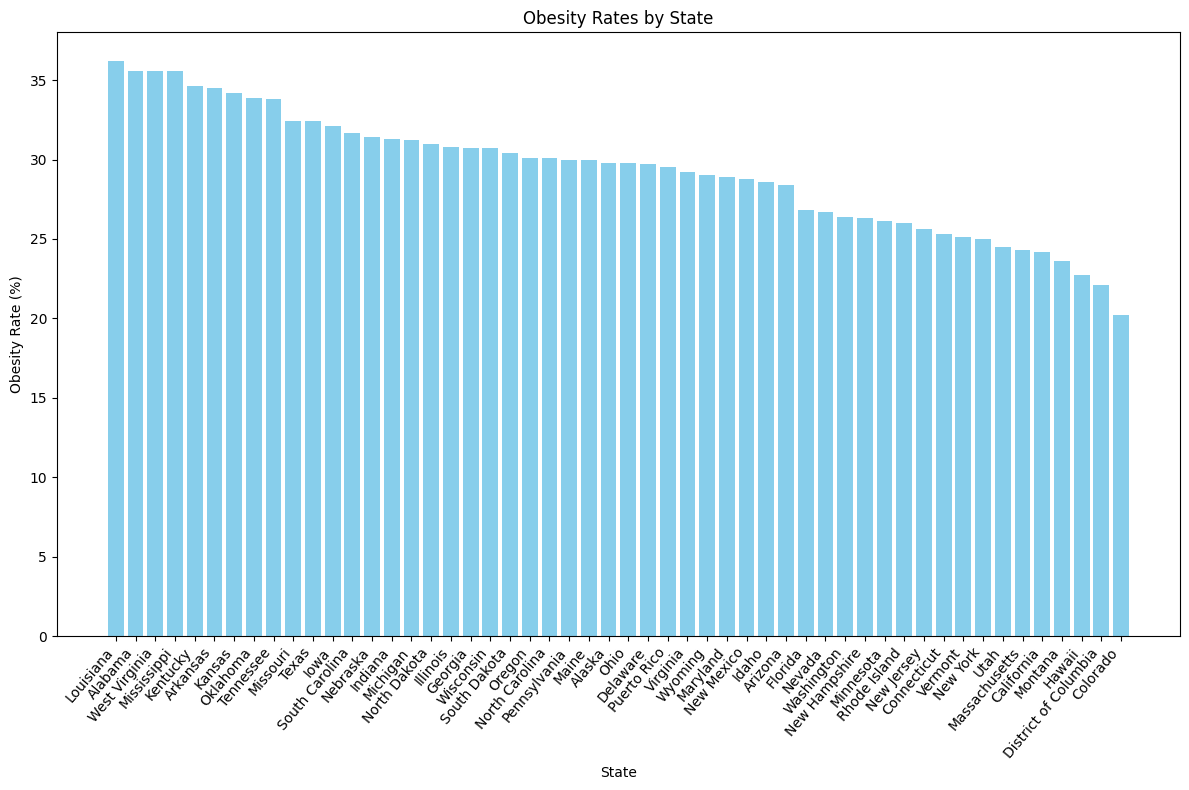

In [641]:
# Sort the dataset by obesity rates for better visualization
sorted_dataset = aggregated_data.sort_values(by='Obesity(%)', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(sorted_dataset['State'], sorted_dataset['Obesity(%)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Obesity Rate (%)')
plt.title('Obesity Rates by State')
plt.xticks(rotation=50, ha='right')

# Show the plot
plt.show()


#Estimating Population Impact with 'Obese People' Column
The 'Obese People' column offers a deeper understanding on the effects of obesity in every state. The percentage of the population that is obese is shown in the 'Obesity(%)' column; however, the 'Obese People' column quantifies this percentage into an approximate count. Government officials, medical professionals, and researchers can use this information to better understand the scope of the obesity problem in various states and to help them make decisions based on population size and prevalence rates.

In [669]:
merged_dataset['Obese People'] = (merged_dataset['Obesity(%)'] * merged_dataset['Population']) / 100

# Display the updated DataFrame
print(merged_dataset[['State', 'Obesity(%)', 'Population', 'Obese People']])

                   State  Obesity(%)  Population  Obese People
0                  Texas        32.4    28635442   9277883.208
1             California        24.2    39346023   9521737.566
2               Kentucky        34.6     4461952   1543835.392
3                Georgia        30.7    10516579   3228589.753
4              Wisconsin        30.7     5806975   1782741.325
5                 Oregon        30.1     4176346   1257080.146
6               Virginia        29.2     8509358   2484732.536
7              Tennessee        33.8     6772268   2289026.584
8              Louisiana        36.2     4664616   1688590.992
9               New York        25.0    19514849   4878712.250
10              Michigan        31.2     9973907   3111858.984
11                 Idaho        28.6     1754367    501748.962
12               Florida        26.8    21216924   5686135.632
13                Alaska        29.8      736990    219623.020
14               Montana        23.6     1061705    250

#CDC Nutrition, Physical Activity, and Obesity - Legislation
This dataset offers a comprehensive perspective on the impact of nutrition, physical activity, and obesity across all 50 US states. In line with our research goals, we will filter the dataset by selectively focusing on data related to obesity cases. This approach ensures a targeted and insightful analysis for our research objectives.

In [642]:
import requests

# Load the CDC dataset
cdc_url = "https://data.cdc.gov/resource/nxst-x9p4.json"
cdc_data = pd.read_json(cdc_url)

In [643]:
#Display first five rows of dataset
cdc_data.head()

,year,quarter,locationabbr,locationdesc,topicdesc,policytopic,datasource,setting,title,status,...,comments,geolocation,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,enacteddate,effectivedate
0,2010,1,NY,New York,Obesity,Incentives,DNPAO,Community,State Fiscal Plan,Dead,...,(Abstract - Enacts into law major components o...,"{'latitude': '42.827001032', 'longitude': '-75...",38,LEG,002OB,029INC,002COM,1641,NaN,NaN
1,2011,1,WV,West Virginia,Nutrition,Appropriations,DNPAO,Community,Sales Tax on Food,Dead,...,(Abstract - Eliminates the sales tax on food e...,"{'latitude': '38.665510202', 'longitude': '-80...",2,LEG,001NUT,002APP,002COM,4781,NaN,NaN
2,2011,1,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,DNPAO,Community,Pedestrian Safety,Dead,...,"(Abstract - Relates to pedestrian safety. ),...","{'latitude': '42.27687047', 'longitude': '-72....",68,LEG,003PA,049BED,002COM,4090,NaN,NaN
3,2010,1,NC,North Carolina,Obesity,Menu Labeling,DNPAO,Community,Governors Budget,Dead,...,"(Abstract - Concerns governors budget. ), (Bil...","{'latitude': '35.466220975', 'longitude': '-79...",41,LEG,002OB,032MNL,002COM,2908,NaN,NaN
4,2011,1,FL,Florida,Physical Activity,"Parks, Recreation and Trails",DNPAO,School/After School,Chronic Diseases<br>,Dead,...,"(Abstract - ""Creates the chronic disease preve...","{'latitude': '28.932040377', 'longitude': '-81...",59,LEG,003PA,034PRT,004SAS,5615,2012-01-01T00:00:00.000,NaN


In [644]:
# Display the columns in the dataset
cdc_data.columns

Index(['year', 'quarter', 'locationabbr', 'locationdesc', 'topicdesc',
       'policytopic', 'datasource', 'setting', 'title', 'status', 'citation',
       'statusaltvalue', 'datatype', 'comments', 'geolocation', 'displayorder',
       'policytypeid', 'healthtopicid', 'policytopicid', 'settingid',
       'provisionid', 'enacteddate', 'effectivedate'],
      dtype='object')

In [645]:
# Select the desired columns
selected_columns = ['locationdesc', 'topicdesc', 'policytopic', 'status']

# Create a new DataFrame with only the selected columns
filtered_cdc_data = cdc_data[selected_columns]

In [646]:
# Rename columns
filtered_cdc_data = filtered_cdc_data.rename(columns={'locationdesc': 'State', 'topicdesc': 'Diagnosis', 'policytopic' : 'ObesityCause'})

In [647]:
# Display the first few rows of the updated dataset
filtered_cdc_data.head()


,State,Diagnosis,ObesityCause,status
0,New York,Obesity,Incentives,Dead
1,West Virginia,Nutrition,Appropriations,Dead
2,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,Dead
3,North Carolina,Obesity,Menu Labeling,Dead
4,Florida,Physical Activity,"Parks, Recreation and Trails",Dead


In [648]:
cdc_data = filtered_cdc_data

In [649]:
cdc_data.columns

Index(['State', 'Diagnosis', 'ObesityCause', 'status'], dtype='object')

In [650]:
# Filter rows where 'Diagnosis' is equal to 'obesity'
cdc_data_obesity_only = cdc_data[cdc_data['Diagnosis'] == 'Obesity']

In [651]:
# Display the first few rows of the filtered dataset
cdc_data_obesity_only.head()

,State,Diagnosis,ObesityCause,status
0,New York,Obesity,Incentives,Dead
3,North Carolina,Obesity,Menu Labeling,Dead
5,Florida,Obesity,Health Insurance Coverage,Dead
6,New Hampshire,Obesity,Food Restrictions,Dead
11,Illinois,Obesity,Food Restrictions,Dead


In [652]:
# Merge the 'merged_dataset' and 'cdc_data_obesity_only' to get final dataset 'USA_Obesity_data'
USA_Obesity_data = pd.merge(merged_dataset, cdc_data_obesity_only, on='State', how='left')

# Save the USA obesity dataset to a CSV file
USA_Obesity_data.to_csv('USA_Obesity_data.csv', index=False)


In [653]:
# Display the final merged dataset
USA_Obesity_data.head()


,State,Obesity(%),Year,Population,Diagnosis,ObesityCause,status
0,Texas,32.4,2020,28635442,Obesity,Food Restrictions,Dead
1,Texas,32.4,2020,28635442,Obesity,Sugar Sweetened Beverages,Enacted
2,Texas,32.4,2020,28635442,Obesity,Appropriations,Dead
3,Texas,32.4,2020,28635442,Obesity,Appropriations,Enacted
4,Texas,32.4,2020,28635442,Obesity,Portion Size,Enacted


In [654]:
# Drop column 'year'
USA_Obesity_data = USA_Obesity_data.drop(columns=['Year'])

# Rename the 'population' column to 'US_Population_2020'
USA_Obesity_data = USA_Obesity_data.rename(columns={'Population': 'Pop2020'})

In [655]:
#Display columns
USA_Obesity_data.columns

Index(['State', 'Obesity(%)', 'Pop2020', 'Diagnosis', 'ObesityCause',
       'status'],
      dtype='object')

In [656]:
USA_Obesity_data.head()

,State,Obesity(%),Pop2020,Diagnosis,ObesityCause,status
0,Texas,32.4,28635442,Obesity,Food Restrictions,Dead
1,Texas,32.4,28635442,Obesity,Sugar Sweetened Beverages,Enacted
2,Texas,32.4,28635442,Obesity,Appropriations,Dead
3,Texas,32.4,28635442,Obesity,Appropriations,Enacted
4,Texas,32.4,28635442,Obesity,Portion Size,Enacted


#Calculating the average population in USA obese
- The average population with obesity in United states came to be 29.29%

In [657]:
# Calculate average populatin obese in USA
average_obesity = merged_dataset['Obesity(%)'].mean()

# Display the average obesity percentage
print(f'Average Obesity Percentage: {average_obesity:.2f}%')


Average Obesity Percentage: 29.29%


#Mean Obesity rates for obesity cause
The below aggregation shows the mean obesity rate associated with issues related to the obesity cause. The bar plot visually represents the mean obesity rates for different causes, providing a quick comparison of their impact. Each bar corresponds to a specific obesity cause, and the height of the bar represents the mean obesity rate for that cause. This visualization is effective for identifying causes with higher or lower mean obesity rates, helping to prioritize focus areas for intervention or further research.

In [658]:
# Group by 'ObesityCause' and calculate the mean obesity rate for each cause
aggregated_by_cause = USA_Obesity_data.groupby('ObesityCause')['Obesity(%)'].mean().reset_index()

# Save the dataset to a CSV file
aggregated_by_cause.to_csv('aggregated_by_cause.csv', index=False)

# Display the aggregated dataset by cause
print(aggregated_by_cause)


                 ObesityCause  Obesity(%)
0    Access to Drinking Water   27.883333
1              Appropriations   28.358571
2       Body Mass Index (BMI)   28.009524
3          Disparities/Equity   28.769231
4           Food Restrictions   28.066000
5   Front of Package Labeling   27.983333
6   Health Insurance Coverage   27.015000
7                  Incentives   26.683333
8    Initiatives and Programs   26.200000
9     Liability and Indemnity   28.455556
10     Marketing Restrictions   26.050000
11              Menu Labeling   27.441667
12               Portion Size   29.100000
13  Sugar Sweetened Beverages   30.175000
14          TV/Screen Viewing   30.100000
15       Task Forces/Councils   29.050000


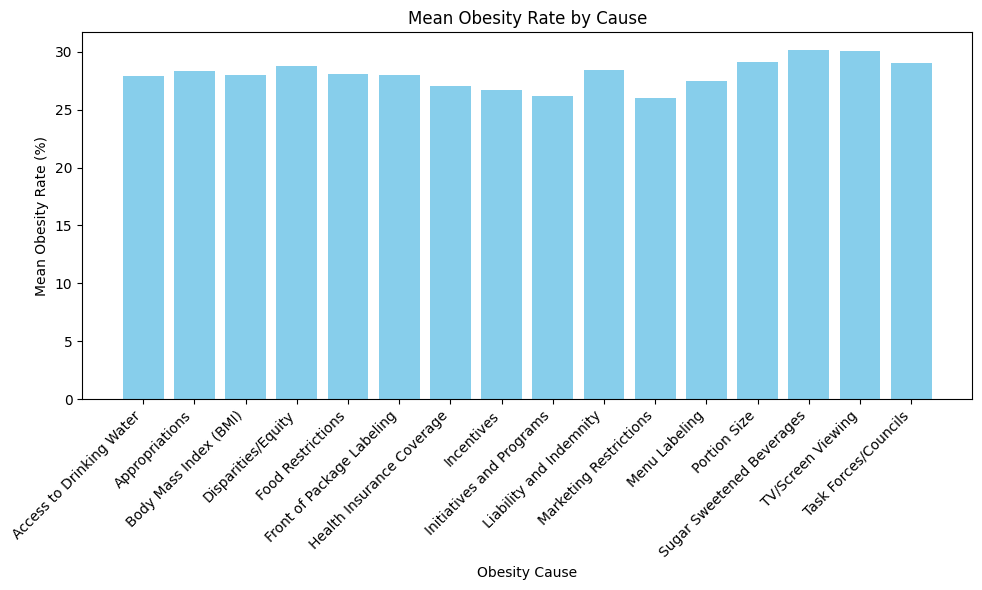

In [659]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(aggregated_by_cause['ObesityCause'], aggregated_by_cause['Obesity(%)'], color='skyblue')
plt.title('Mean Obesity Rate by Cause')
plt.xlabel('Obesity Cause')
plt.ylabel('Mean Obesity Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


#State and Cause Analysis: Mean Obesity Rates in the USA_Obesity_data Dataset
The code aggregates the USA_Obesity_data dataset by grouping it based on the 'State' and 'ObesityCause' columns. For each unique combination of 'State' and 'ObesityCause,' it calculates the mean of the 'Obesity(%)' column. The resulting DataFrame, named aggregated_by_state_cause, contains columns for 'State,' 'ObesityCause,' and the corresponding mean 'Obesity(%)' for each combination. This aggregated information provides a summarized view of obesity rates, offering insights into how they vary across different states and causes.


In [660]:
# Group by 'State' and 'ObesityCause' and calculate the mean obesity rate for each combination
aggregated_by_state_cause = USA_Obesity_data.groupby(['State', 'ObesityCause'])['Obesity(%)'].mean().reset_index()

# Save the aggregated dataset to a CSV file
aggregated_by_state_cause.to_csv('aggregated_by_state_cause.csv', index=False)

# Display the aggregated dataset by state and cause
print(aggregated_by_state_cause)


             State               ObesityCause  Obesity(%)
0          Alabama             Appropriations        35.6
1          Alabama          Food Restrictions        35.6
2          Alabama              Menu Labeling        35.6
3           Alaska             Appropriations        29.8
4          Arizona              Menu Labeling        28.4
..             ...                        ...         ...
160  West Virginia              Menu Labeling        35.6
161      Wisconsin             Appropriations        30.7
162      Wisconsin              Menu Labeling        30.7
163        Wyoming             Appropriations        29.0
164        Wyoming  Front of Package Labeling        29.0

[165 rows x 3 columns]


#Obesity rates by cause
The below Pie chart provides a visual representation of the distribution of obesity rates across different causes. Each slice of the pie corresponds to a specific cause, and the size of the slice represents the proportion of the total obesity rates attributed to that cause. The percentage labels on each slice provide additional information about the proportion of the whole that each cause represents.

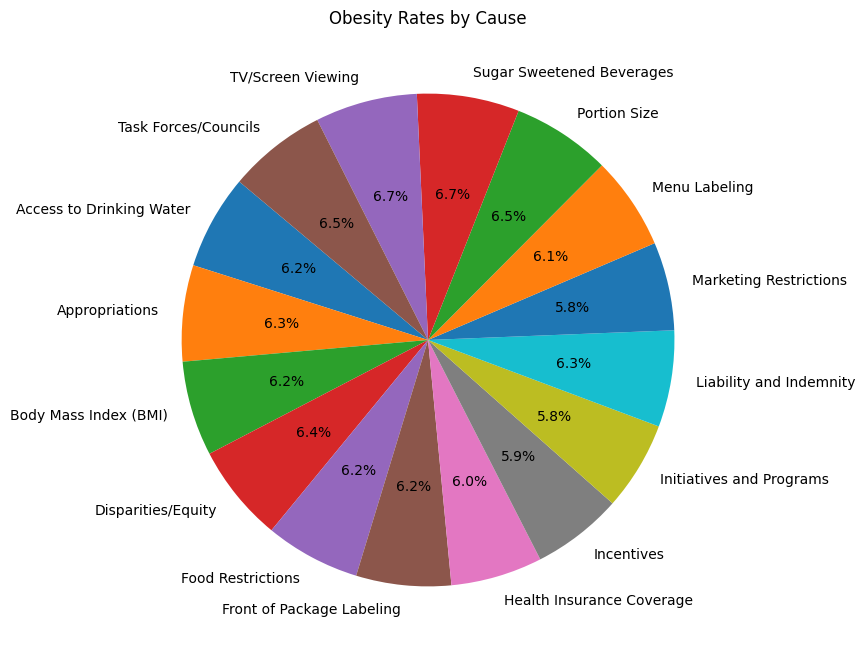

In [661]:
# Create a pie chart for obesity causes
plt.figure(figsize=(10, 8))
plt.pie(aggregated_by_cause['Obesity(%)'], labels=aggregated_by_cause['ObesityCause'], autopct='%1.1f%%', startangle=140)
plt.title('Obesity Rates by Cause')
plt.show()


#Analysis of population Status Distribution in the USA_Obesity_data Dataset
The distribution of various population statuses in the'status' column of the USA_Obesity_data dataset is shown in the count plot. A unique status category is represented by each bar in the plot, and the height of the bar indicates the number or frequency of occurrences for each status.The major number of population with obesity are seen dead

In [662]:
import seaborn as sns

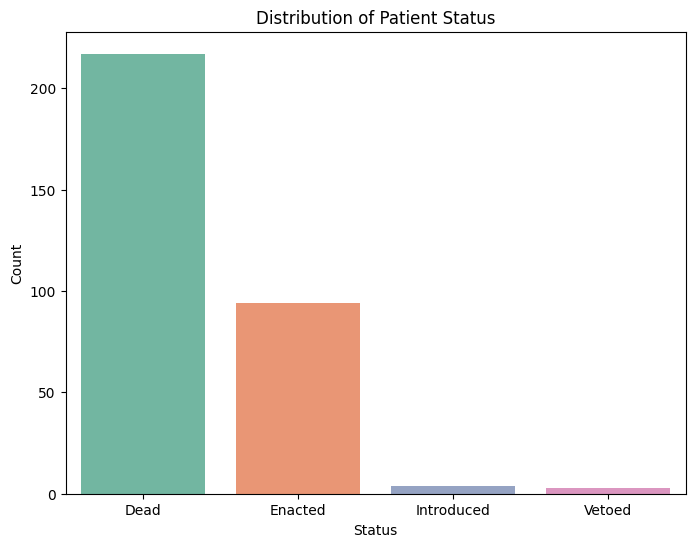

In [663]:
# Create a count plot for the 'status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=USA_Obesity_data, palette='Set2')
plt.title('Distribution of Patient Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


#State-wise Analysis: Average Obesity Rates in the USA_Obesity_data Dataset
The average obesity rate for each state in the dataset is shown visually in its resulting bar plot. Every bar represents a state, and the average obesity rate for each state is indicated by the height of the bar. The rotation of the state names on the x-axis is applied for better readability, especially when dealing with a large number of states.

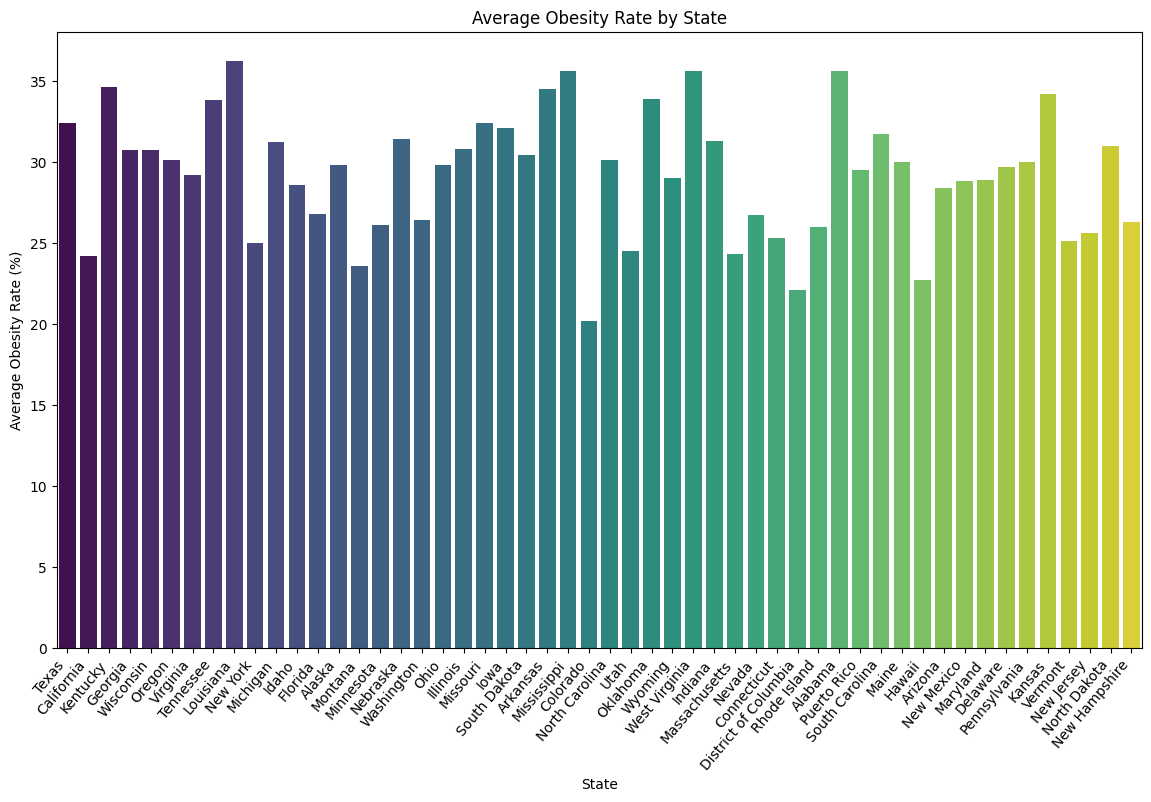

In [664]:
#plot bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Obesity(%)', data=USA_Obesity_data, palette='viridis')
plt.title('Average Obesity Rate by State')
plt.xlabel('State')
plt.ylabel('Average Obesity Rate (%)')
plt.xticks(rotation=50, ha='right')
plt.show()


#Visualizing Obesity Rates: Stacked Bar Chart by State and Cause
The resulting stacked bar chart provides a visual representation of obesity rates across different states, segmented by various causes. Each bar represents a state, and the segments within each bar represent the contribution of different obesity causes to the overall obesity rate in that state. This visualization allows for a comparative analysis of obesity rates and their distribution by cause across different states. The legend helps identify the specific causes represented by each color in the chart.

<Figure size 800x600 with 0 Axes>

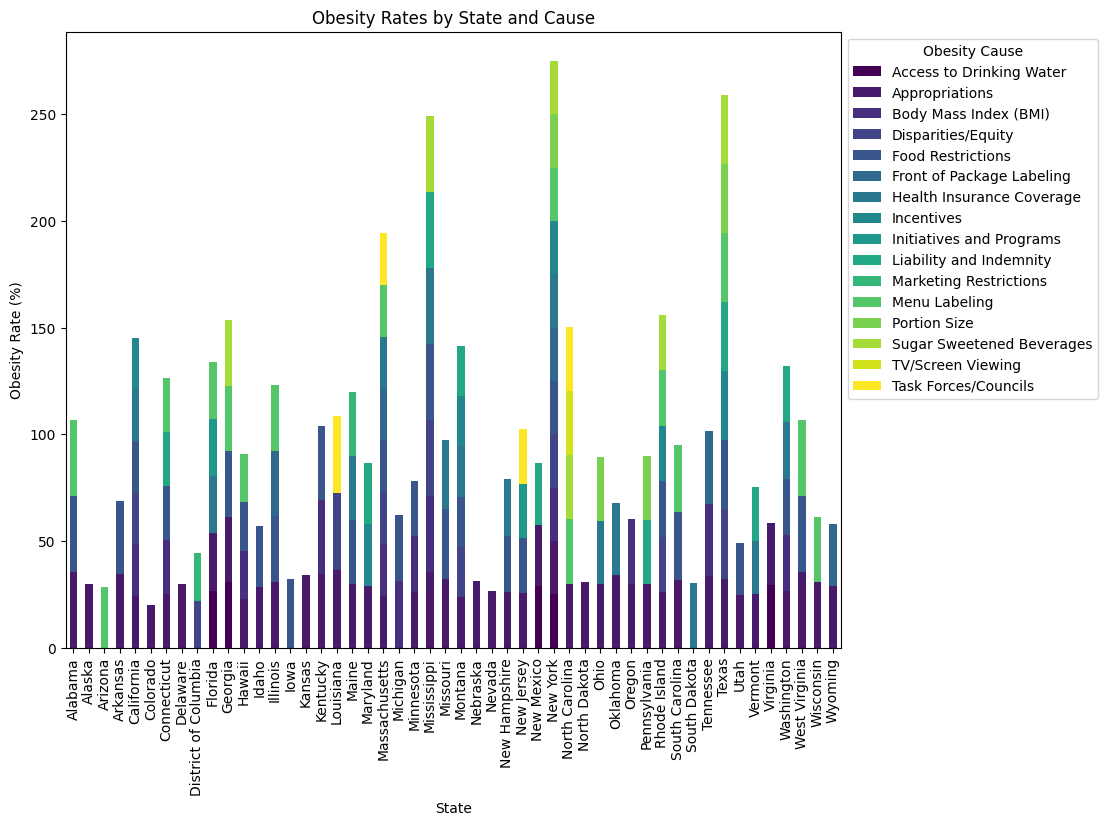

In [665]:
# Create a stacked bar chart for obesity rates by state and cause with a smaller figure size
plt.figure(figsize=(8, 6))
stacked_data = aggregated_by_state_cause.pivot(index='State', columns='ObesityCause', values='Obesity(%)')
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))
plt.title('Obesity Rates by State and Cause')
plt.xlabel('State')
plt.ylabel('Obesity Rate (%)')
plt.legend(title='Obesity Cause', bbox_to_anchor=(1, 1))
plt.show()


#Visualizing Obesity Rates: Heatmap by Obesity Cause and State
The heatmap that follows shows the rate of obesity in each state as well as its root causes. It uses a pivot table to restructure the original dataset, determines the mean for duplicate items, and then generates a heatmap to show the obesity rates. The heatmap's color intensity shows the magnitude of obesity rates, while the annotations give the precise numbers for every state and obesity cause combination. The patterns and trends in obesity rates across various states and reasons can be found with the use of this visualization.

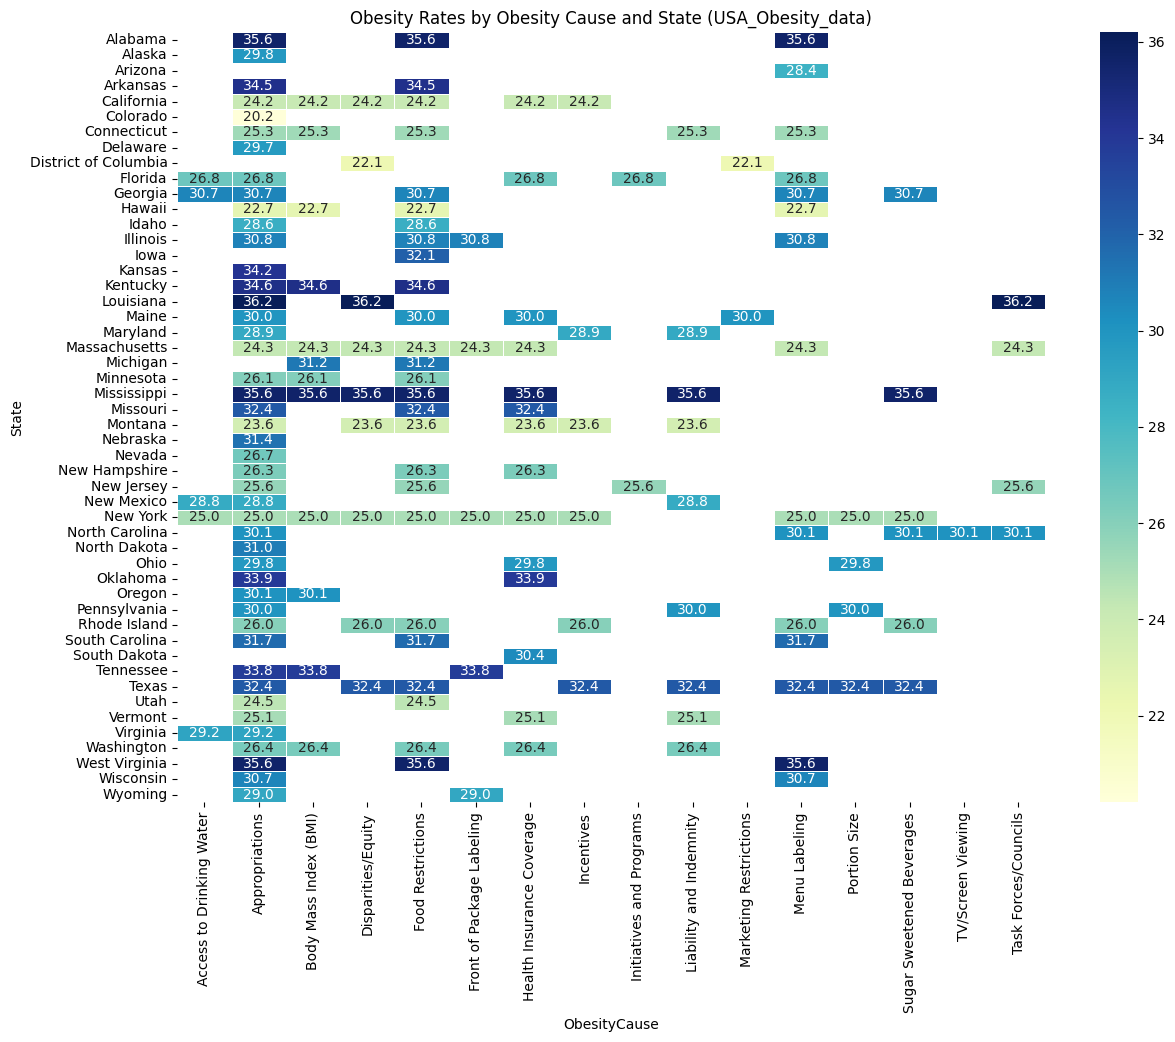

In [667]:
plt.figure(figsize=(14, 10))

# Create a heatmap for obesity rates by 'ObesityCause' and 'State'
heatmap_data = USA_Obesity_data.pivot_table(index='State', columns='ObesityCause', values='Obesity(%)', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)

plt.title('Obesity Rates by Obesity Cause and State (USA_Obesity_data)')
plt.show()


#Conclusion
This research project has delved into the critical issue of the  obesity rates in United states, providing valuable insights through data analysis and visualizations. The primary objective was to shed light on the severity of obesity, empower individuals to make informed choices, and offer valuable information for healthcare systems and government initiatives.

The visualizations presented, such as bar plots, heatmaps, and aggregated datasets, serve as powerful tools to communicate the prevalence of obesity across different states, causes, and diagnoses. These visuals not only facilitate a deeper understanding of the issue but also can help influencers, YouTubers, and the government to effectively communicate the severity of obesity to the public.

For influencers and content creators, these visualizations can be helpful to convey the seriousness of obesity-related issues to their audience, fostering awareness and encouraging healthier lifestyles. Meanwhile, government entities can use the provided information to prioritize interventions, concentrating efforts on states with the highest obesity rates. Moreover, the research suggests the importance of studying states with lower obesity rates to identify successful strategies that can be implemented nationwide.

The ultimate objective of this research is to encourage proactive strategies and action to overcome the obesity epidemic. Through the utilization of data-driven insights and visualizations, organizations can work together to put efforts into action, inform the public, and create a society that is healthier and better educated.






